<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsKGv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Overview

The code, suitable for Google Colab, orchestrates the extraction, validation, and visualization of entities from multiple web pages. Key features include the installation of SpaCy for advanced NLP tasks, and the initialization of a comprehensive NLP model for precise entity extraction. It includes a mapper function for entity extraction, a reducer for data aggregation and conflict resolution, and a post-processing step for entity validation. The code's `knowledge_reduce` function efficiently processes multiple URLs, accumulating and refining data. Finally, it visualizes this data as a knowledge graph and saves it in GEXF and GraphML formats. Enhanced with robust error handling and logging, the code ensures efficient debugging and maintenance.

# Step 1: Library Installation

In [1]:
!pip install spacy networkx matplotlib
!python -m spacy download en_core_web_lg

2023-12-19 15:16:26.659274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 15:16:26.659332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 15:16:26.661321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 15:16:26.672222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 15:16:27.828330: W tensorflow/compiler/tf2

# Step 2: Import Libraries and Initialize Logger

In [2]:
import requests
from bs4 import BeautifulSoup
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import os
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Step 3: Initialize NLP Model

In [3]:
nlp = spacy.load("en_core_web_lg")

# Step 4: Enhanced Mapper Function

In [4]:
def enhanced_mapper(document):
    doc = nlp(document)
    return [(ent.text.strip(), ent.label_) for ent in doc.ents if ent.text.strip()]

# Step 5: Improved Reducer Function

In [5]:
def improved_reducer(accumulated, new_value):
    for entity in new_value:
        if entity not in accumulated:
            accumulated.add(entity)
    return accumulated

# Step 6: Post-Processing Function

In [6]:
def post_process_extracted_data(data):
    validated_data = set()
    for entity in data:
        if validate_entity(entity):
            validated_data.add(entity)
    return validated_data

def validate_entity(entity):
    return entity[1] in ['PERSON', 'ORG', 'GPE', 'DATE', 'EVENT']

# Step 7: Knowledge Reduction Function

In [7]:
def knowledge_reduce(urls):
    accumulated_data = set()
    for url in urls:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                entities = enhanced_mapper(response.text)
                entities = post_process_extracted_data(entities)
                accumulated_data = improved_reducer(accumulated_data, entities)
            else:
                logger.error(f"Error {response.status_code} fetching {url}")
        except requests.RequestException as e:
            logger.error(f"Request failed for {url}: {e}")
    return accumulated_data

# Step 8: Graph Creation, Visualization, and Export

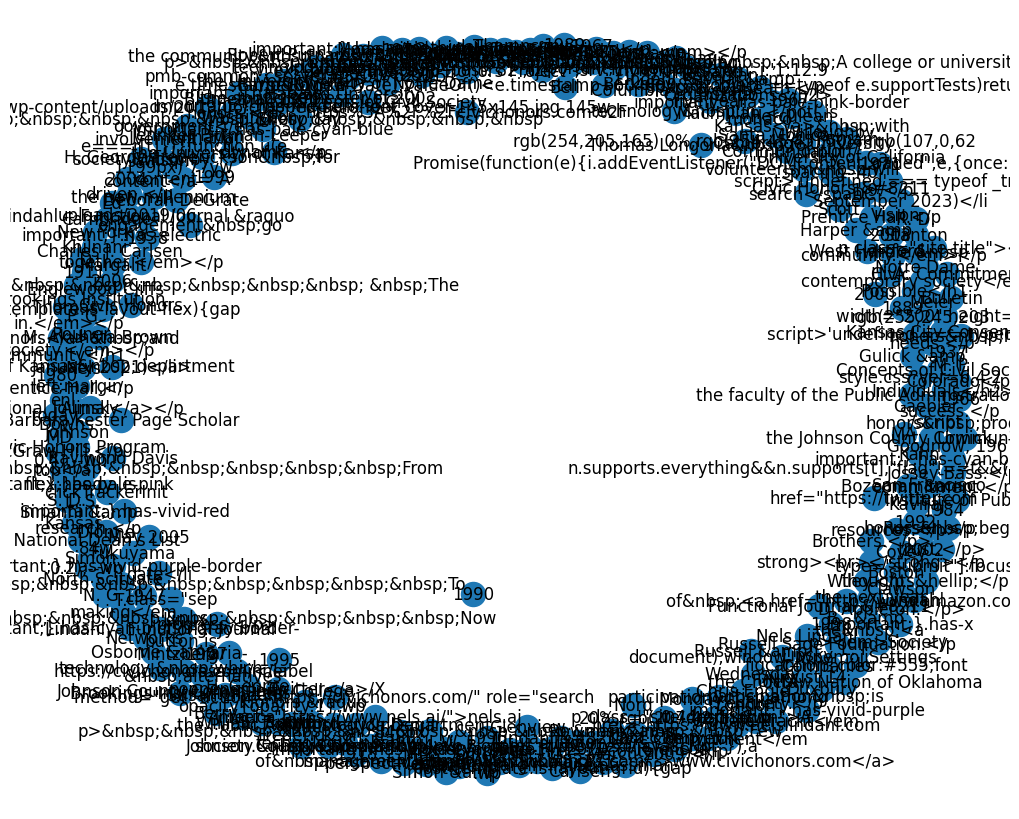

In [8]:
def create_visualize_and_export_graph(data, output_dir):
    G = nx.DiGraph()
    for entity in data:
        G.add_node(entity[0], label=entity[1])
    plt.figure(figsize=(10, 8))
    nx.draw(G, with_labels=True)
    plt.show()
    os.makedirs(output_dir, exist_ok=True)
    gexf_path = os.path.join(output_dir, "knowledge_graph.gexf")
    nx.write_gexf(G, gexf_path)
    logger.info(f"GEXF file saved to: {gexf_path}")
    graphml_path = os.path.join(output_dir, "knowledge_graph.graphml")
    nx.write_graphml(G, graphml_path)
    logger.info(f"GraphML file saved to: {graphml_path}")

urls = ["https://civichonors.com/", "https://nelslindahl.com/"]
create_visualize_and_export_graph(knowledge_reduce(urls), "/content")
